**In this notebook, I would like to predicting power fails in 10 days periods.**
===========================================
1. Generate a dataset for this task
2. Try out and evaluate models

In [32]:
#Import packages
from math import radians, sin, cos, atan2, sqrt
import pytz
import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta
import re
from IPython.display import Image
import itertools
import folium
import pandas as pd
from IPython.display import display

In [2]:
#Set up Working Directory and Data Files
drive = 'G'
if drive == 'G':
    data_dir = '../01.data/'
    output_dir = '../05.outputs/'
else:
    data_dir = '..\\01.data\\'


In [6]:
def calculate_distance (pt1,pt2):
    """
    Computes distance between two geographic coordinates
    :param pt1: [Lat,Lon] for first point
    :param pt2: [Lat,Lon] for second
    :returns distance in km between the two points
    """
    # Radius of the earth in km (Hayford-Ellipsoid)
    EARTH_RADIUS = 6378388/1000
    
    d_lat = radians (pt1[0] - pt2[0])
    d_lon = radians (pt1[1] - pt2[1])
    
    lat1 = radians(pt1[0])
    lat2 = radians(pt2[0])
    
    a = sin(d_lat/2) * sin(d_lat/2) + \
        sin(d_lon/2) * sin(d_lon/2) * cos(lat1) * cos(lat2)
        
    c = 2 * atan2(sqrt(a), sqrt(1-a))

    return c * EARTH_RADIUS

In [9]:
#Load data of hourly power events: data prpcessed by JP
d = pd.read_csv(data_dir + 'powerout.csv')
#Get box location
bx = pd.read_csv(data_dir + 'Boxes.csv', usecols=['LONG','LAT','ClusterId','BoxID'])
#rename some cols
bx.rename (columns={'LONG': 'lon','LAT':'lat'},inplace=True)

In [12]:
target = [38.646476, 68.767614] 
bx ['dist'] = bx.apply(lambda row: calculate_distance([row['lat'],row['lon']],target),axis=1)

In [20]:
df = bx.sort_values (by = ['dist'], ascending=True)[:5]
df[df.BoxID==1114].lon

113    68.767614
Name: lon, dtype: float64

In [24]:
xy = [df[df.BoxID==1114].lat.values[0], df[df.BoxID==1114].lon.values[0]]
xy

[38.646475940000002, 68.767613519999998]

In [19]:
df.BoxID.values

array([1114, 1147, 1145, 1209, 1067])

In [28]:
means = []
for i in range(1000):
     dist = np.random.normal(loc=0,scale=1, size=1000)
     means.append(np.mean(dist))

In [31]:
0-np.mean(means)

0.00065243407083300962

In [13]:
bx.sort_values(by='ClusterId')

,ClusterId,BoxID,lon,lat,dist
113,1,1114,68.767614,38.646476,0.000042
146,1,1147,68.767614,38.646476,0.000042
223,2,1228,68.774906,38.564038,9.199216
213,2,1218,68.774906,38.564038,9.199216
204,3,1209,68.793565,38.599644,5.681088
144,3,1145,68.793565,38.599644,5.681088
66,4,1067,68.728774,38.579677,8.167780
232,4,1238,68.728774,38.579677,8.167780
291,5,1297,68.740315,38.574719,8.333731
101,7,1102,68.745570,38.557277,10.113446


In [16]:
d2 = pd.merge (left = d, right=bx, on='BoxID', how='left')

In [17]:
#Experiment with a single cluster
d101 = d2[d2.ClusterId==101]

#Drop some columns
#Kepp only required columns
to_keep = ['BoxID', 'date_powerfailure', 'date_powerfailure_hour',
       'date_powerback', 'date_powerback_hour','duration','POWERout','checks','DateCollectionStart']
d101 = d101[to_keep]

#change to datetime objects
d101['date_powerfailure'] = d101.apply(lambda x: pd.datetime.strptime(x['date_powerfailure'], '%d%b%Y'), axis=1)

#Sort by date and hour
d101 = d101.sort_values (by = ['BoxID','date_powerfailure','date_powerfailure_hour'])

In [30]:
#Ideally from the start to the end, the hourly data should have slots for each hour
#It seems it doesnt
d_dy = pd.DataFrame(d101.groupby(['BoxID','date_powerfailure'])['date_powerfailure'].count())

In [29]:
d_dy.reset_index()

ValueError: cannot insert date_powerfailure, already exists

**Create a blank ideal dataset at hourly level**
====================================================

In [19]:
start = d101.date_powerfailure.min()
end = d101.date_powerfailure.max()
stamps = pd.date_range(start,end, freq='1h')

lst_boxes = list (d.BoxID.unique())

data = {'datetime': [], 'box_id': []}

for d in lst_boxes:
    data['datetime'].append([i for i in stamps])
    
    data['box_id'].append(d*len(stamps))

In [22]:
lst_boxes = list (d2.BoxID.unique())

dates = []
boxes = []

for bx in lst_boxes:
    dates.append(stamps)
    
    boxes.append([bx]*len(stamps))

data = {'datetime': list(itertools.chain(*dates)), 'box_id': list(itertools.chain(*boxes))}

#Ideal hourly dataframe would look like this
d_hr = pd.DataFrame(data)

#Add other columns
d_hr['pwr_state'] = 1
d_hr['box_state'] = 1

In [24]:
#Evaluate predictpr
#Get box location
bx = pd.read_csv(data_dir + 'Boxes.csv', usecols=['LONG','LAT','ClusterId','BoxID'])
d2 = pd.merge (left = bx, right=d_dy,on='BoxID', how='right')
#rename soem cols
d2.rename (columns={'LONG': 'lon','LAT':'lat'},inplace=True)


KeyError: 'BoxID'

In [4]:
#Kepp only required columns
to_keep = ['BoxID', 'date_powerfailure', 'date_powerfailure_hour',
       'date_powerback', 'date_powerback_hour','duration','POWERout']
d = d[to_keep]

#Change duration to hours
d['duration_hrs'] = d.apply(lambda x: x['duration']/60,axis=1)

#change to datetime objects
d['date_powerfailure'] = d.apply(lambda x: pd.datetime.strptime(x['date_powerfailure'], '%d%b%Y'), axis=1)

#d['date_powerback'] = d[].apply(lambda x: pd.datetime.strptime(x['date_powerback'], '%d%b%Y'), axis=1)

In [5]:
#Collapse data to daily level
#For all the hours of the day, I simply take the maximum POWERout val
d_dy = pd.DataFrame(d.groupby(['BoxID','date_powerfailure'])['POWERout'].max())
d_dy.reset_index(inplace=True)
d_dy.rename(columns={'POWERout': 'pwrout_1dy'},inplace=True)

In [6]:
def generate_train_data (d_raw,date,num_days,target):
    """
    This function returns a training dataset for prediction.

    @param d_raw: reasonably preprocessed data
    @param date: date threshold (when to stop) e.g., 2016/10/20
    @param num_days: Number of days to consider
    @return: Returns a dataset where each row represents a time interval(num_days) with corresponding
    @raise keyError: raises an exception
    """
    
    #create a list of num_days time intervals covering 2016 october-1 up date
    start = d_raw.date_powerfailure.min().date()
    end = datetime.strptime(date,'%Y/%m/%d').date()
    delta = timedelta(days=num_days)
    date_list = []

    while start <= end:
        tup = (start,start+delta)
        date_list.append (tup)

        start +=  timedelta(days=num_days+ 1)
        
    #Use cartesian product to create a dataframe of the dates created above
    #and boxID's
    date_boxid = pd.DataFrame(list(itertools.product(date_list,list(d_raw.BoxID.unique()))),columns=['dates','BoxID'])
    
    result =[]
    d_10dy = pd.DataFrame
    for date in list(date_list):
        #Select events in this range
        mask = (d_raw['date_powerfailure'] >= date[0]) & (d_raw['date_powerfailure'] <= date[1])
        d_raw_within = d_raw.loc[mask]
        
        #Summarise powerouts to num_days level
        d_raw_by_box = pd.DataFrame(d_raw_within.groupby(['BoxID'])[target].max())
        d_raw_by_box.reset_index(inplace=True)
        
        new_powerout_col = 'pwrout_' + str(num_days) + 'dy'
        d_raw_by_box.rename(columns={target: new_powerout_col},inplace=True)
        d_raw_by_box['dates'] = [date for i in range(d_raw_by_box.shape[0])]
        
        #create a df of summarised power failure events
        if len (result) == 0:
            d_10dy = d_raw_by_box
        else:
            d_10dy = d_10dy.append (d_raw_by_box)
        
        result.append (d_raw_by_box)
            
    #print (date_boxid.head())
    d2 = pd.merge (left = bx, right=d_10dy,on='BoxID', how='right')
    
    #Rearrange columns
    d2 = d2 [['dates','ClusterId','BoxID','LONG','LAT','pwrout_10dy']]
    
    #rename soem cols
    d2.rename (columns={'LONG': 'lon','LAT':'lat'},inplace=True)
    return d2

In [7]:
from math import sin, cos, sqrt, atan2, radians
def calculate_distance (pt1,pt2):
    """
    Computes distance between two geographic coordinates
    :param pt1: [Lat,Lon] for first point
    :param pt2: [Lat,Lon] for second
    :returns distance in km between the two points
    """
    # Radius of the earth in km (Hayford-Ellipsoid)
    EARTH_RADIUS = 6378388/1000
    
    d_lat = radians (pt1[0] - pt2[0])
    d_lon = radians (pt1[1] - pt2[1])
    
    lat1 = radians(pt1[0])
    lat2 = radians(pt2[0])
    
    a = sin(d_lat/2) * sin(d_lat/2) + \
        sin(d_lon/2) * sin(d_lon/2) * cos(lat1) * cos(lat2)
        
    c = 2 * atan2(sqrt(a), sqrt(1-a))

    return c * EARTH_RADIUS

In [135]:
def predict_with_nearest_neighbor (poi,points,target):
    """
    Computes distance between a point of interest and the rest of the points
    :param pt1: [Lat,Lon] for first point
    :param pt2: [Lat,Lon] for second
    :returns a dict object with BoxID and distances
    """
    #dict object to 
    distances = {}
    min = 500000.000
    min_bx = ''
    predicted_pwrstate = ''
    
    for bx in list(points.BoxID.unique()):
        d_bx = points[points.BoxID == bx]
        dist = calculate_distance (poi,[d_bx.lat,d_bx.lon])
        
        if dist < min:
            min = dist
            predicted_pwrstate = d_bx[target].values[0]
            min_bx = bx
    
    print (predicted_pwrstate)
    return [min_bx, predicted_pwrstate, min]

In [22]:
#Try out prediction
from random import shuffle
from random import randint
def evaluate_nearest_neighbor_predictor(df, k, num_days):
    """
     This function quickly evaluates perfomance of nearest neighbor approach 
     by leaving out the location being tested.
    :param df: Data under consideration
    :param k: NUmber of locations to test for
    :param num_days: In this case, since they are many dates, how many dates to test
    :returns a big dict object 
    """
    #Get a list of boxes/locations to predict and shuffle them
    boxes = list (df.BoxID.unique())
    
    shuffle (boxes)
    
    
    all_res = []
    for k_i in range(k):
        #Randomly select location/box to predict
        box_id = boxes[randint(0,k)]
        
        #The actual location
        df_bx = df[df.BoxID==box_id]
        
        xy = [df_bx.iloc[0].lat, df_bx.iloc[0].lon]
        
        #remove all data with this location
        train = df[df.BoxID != box_id]
        
        #Get correct label information
        test =  df[df.BoxID == box_id]
        
        #Available dates on which we can test our predictor and shuffle them
        num_dates = test.shape[0]
        if num_days > num_dates:
            dates = list(test.date_powerfailure.unique())
        else:
            dates = [list(test.date_powerfailure.unique())[i] for i in range(num_days)]
            shuffle (dates)
    
        res = {}
        tot = 0
        correct = 0
        for d in dates:
            #Get a subset of events for this date
            df_d = train[train.date_powerfailure == d]

            #Make prediction
            predicted = predict_with_nearest_neighbor (xy, df_d, 'pwrout_1dy')
            
            
            #Actual
            df_actual = test[test.date_powerfailure==d]
            actual = df_actual.iloc[0].pwrout_1dy
            
            #just check if here are more than one observations
            if df_actual.shape[0] > 1:
                print ('More than one records for this date.....')
            
            
            res[box_id] = {'date': d, 'actual': actual, 'predicted': predicted[1],'dist': predicted[2]}
            
            all_res.append(res)
            
            if actual == predicted[2]:
                correct +=1
            
            tot += 1
        #compute accuracy for this Location
        print ('Accuracy for box %s is %s '%(box_id, correct/tot * 100))
            

In [10]:
#Evaluate predictpr
#Get box location
bx = pd.read_csv(data_dir + 'Boxes.csv', usecols=['LONG','LAT','ClusterId','BoxID'])
d2 = pd.merge (left = bx, right=d_dy,on='BoxID', how='right')
#rename soem cols
d2.rename (columns={'LONG': 'lon','LAT':'lat'},inplace=True)


**Finally lets see perfomance on separate locations....**
============================================================
Note that this evaluation is being done on sampled locations...just leaving them out

In [ ]:
evaluate_nearest_neighbor_predictor(d2, 50, 50)

In [66]:
#Lets try predictions on random locations

In [ ]:
coords = d2 [['lon','lat']]
coords = coords.sort_values(by  = ['lon','lat'] )
coords['xy'] = coords.apply(lambda x: (x['lon'], x['lat']),axis=1)
xy = coords.xy.unique()

In [ ]:
**Here are the sample

In [89]:
def generate_random_location(min,max,num):
    x = np.random.uniform(min[0], max[0], size=(num))[0]
    
    y = np.random.uniform(min[1], max[1], size=(num))[0]
    
    return [x,y]

0.0


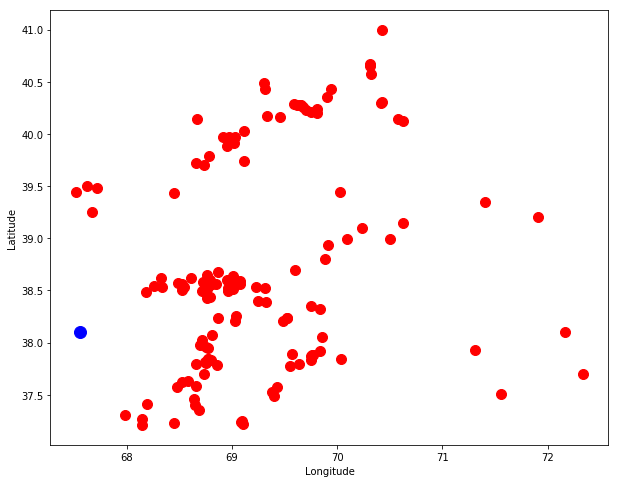

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xlabel ('Longitude')
plt.ylabel ('Latitude')

#Generate random point
pt = generate_random_location(min,max,1)

#Choose prediction date
d = d2.date_powerfailure.unique()[0]

predicted = predict_with_nearest_neighbor (pt, d2[d2.date_powerfailure==d], 'pwrout_1dy')

plt.plot([i[0] for i in xy[1:]] , [i[1] for i in xy[1:]], 'ro',markersize=10)

plt.plot (pt[0],pt[1],'bo',markersize=12)

plt.show()

In [137]:
print ('Predicted power state-%s  from box at distance %s km '%(predicted[1],predicted[2]))

Predicted power state-0.0  from box at distance 145.9631965834707 km 


In [138]:
boxid = predicted[0]

box_loc = [d2[d2.BoxID==boxid].lon,d2[d2.BoxID==boxid].lat]